# url: https://di-acc2.com/marketing/16651/

## Python環境の構築

In [1]:
!pip install mlxtend

## データセットの説明

In [2]:
# KaggleのApriori Association Grocery Storeにアクセスし、Grocery Products Purchase.csv.xlsをダウンロードしましょう。
# これは、あるスーパーマーケットにおける購買データであり、今回こちらを分析対象データとして用います。

# このデータセットをもとに、スーパーマーケットで売られている商品の組み合わせに対してアソシエーション分析を適用します。
# 最終的に強い関係性を示す（高頻度で一緒に購入される）商品の組み合わせをアソシエーション・ルールとして抽出することが目的です。

import matplotlib.pyplot as plt
import pandas as pd

## データの準備

In [3]:
# データセット
data = pd.read_csv('/content/data_for_association_analysis_3.csv')

display(data)
# 最左のインデックス番号が顧客番号だと考えましょう。顧客番号毎に購入した商品が列として掲載されています。
# 例えば、0番目の顧客であれば、1つ目の商品として「citrus fruit」を購入し、2つ目の商品として「semi-finished bread」を購入したことを意味します。

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## データ加工｜トランザクション形式データセットに変換

In [4]:
# 後述ではアソシエーション分析用のモデルを構築し、そのモデルにインプットデータを渡すことで、最終的にアソシエーション・ルールを抽出します。
# ここで、アソシエーションモデルに渡すインプットデータの形式は「トランザクション型」または「テーブル型」という制約があるため、以下に示すデータ加工プログラムを通じて、データ形式を変換しましょう。

# 前述のデータセットをトランザクション型のデータ形式に変換する方法を以下に示します。

# レコード数
record_len = len(data)
# カラム数
column_len = len(data.columns)

# トランザクション形式に加工
transactions = []
for i in range(record_len):
    # データをリスト型に変更
    values = [str(data.values[i,j]) for j in range(column_len)]
    values_notnull = []
    for check in values:
        if check != 'nan':
            values_notnull.append(check)
    transactions.append(values_notnull)

# 上記コード実行により、商品の購入履歴がトランザクションのリスト型として出力されるようになります。

In [5]:
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

## データ加工｜テーブル形式データセットに変換

In [6]:
# アソシエーション分析モデルに対して、今回は「テーブル型」のインプットデータを渡すこととします。
# テーブル型とは、データセットの列項目が商品名として表され、各種列項目の値が購入有無による真偽値として表されたデータフレームを指します。

# 前述で得られたトランザクション型のデータセットをさらに「テーブル型」に変換しましょう。

from mlxtend.preprocessing import TransactionEncoder

# データをテーブル形式に加工
te       = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df       = pd.DataFrame(te_array, columns=te.columns_)

display(df)
# 上記のコードを実行すると、データフレームのカラムに商品名が入り、トランザクション番号（index）毎に購入された商品が真偽値（True/False）で表示された結果が得られます。

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Aprioriモデル作成・評価

In [7]:
# 前述で取得したテーブル型のデータセットを用いて、Aprioriによるアソシエーション分析モデルを作成します。
# モデル作成｜itemsets・support算出
# まずはじめに、商品の組み合わせ別に支持度（Support）を算出します。以下を実行しましょう。

from mlxtend.frequent_patterns import apriori

freq_items = apriori(df,                     # データフレーム
                     min_support  = 0.01,    # 支持度(support)の最小値
                     use_colnames = True,    # 出力値のカラムに購入商品名を表示
                     max_len      = None,    # 生成されるitemsetsの個数
                     verbose = 0,            # low_memory=Trueの場合のイテレーション数
                     low_memory = False,     # メモリ制限あり＆大規模なデータセット利用時に有効
                    )

display(freq_items)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(tropical fruit, root vegetables, whole milk)"
329,0.014540,"(yogurt, root vegetables, whole milk)"
330,0.010473,"(yogurt, soda, whole milk)"
331,0.015150,"(yogurt, tropical fruit, whole milk)"


In [8]:
# 結果出力
freq_items = freq_items.sort_values("support", ascending = False).reset_index(drop=True)
display(freq_items)

# mlxtend.frequent_patterns.apriori()メソッドを用いることで、商品の組み合わせ（itemsets）別に支持度（support）を算出できます。

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.255516,(whole milk)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.174377,(soda)
4,0.139502,(yogurt)
...,...,...
328,0.010066,"(frankfurter, sausage)"
329,0.010066,"(curd, yogurt, whole milk)"
330,0.010066,"(rolls/buns, curd)"
331,0.010066,"(tropical fruit, napkins)"


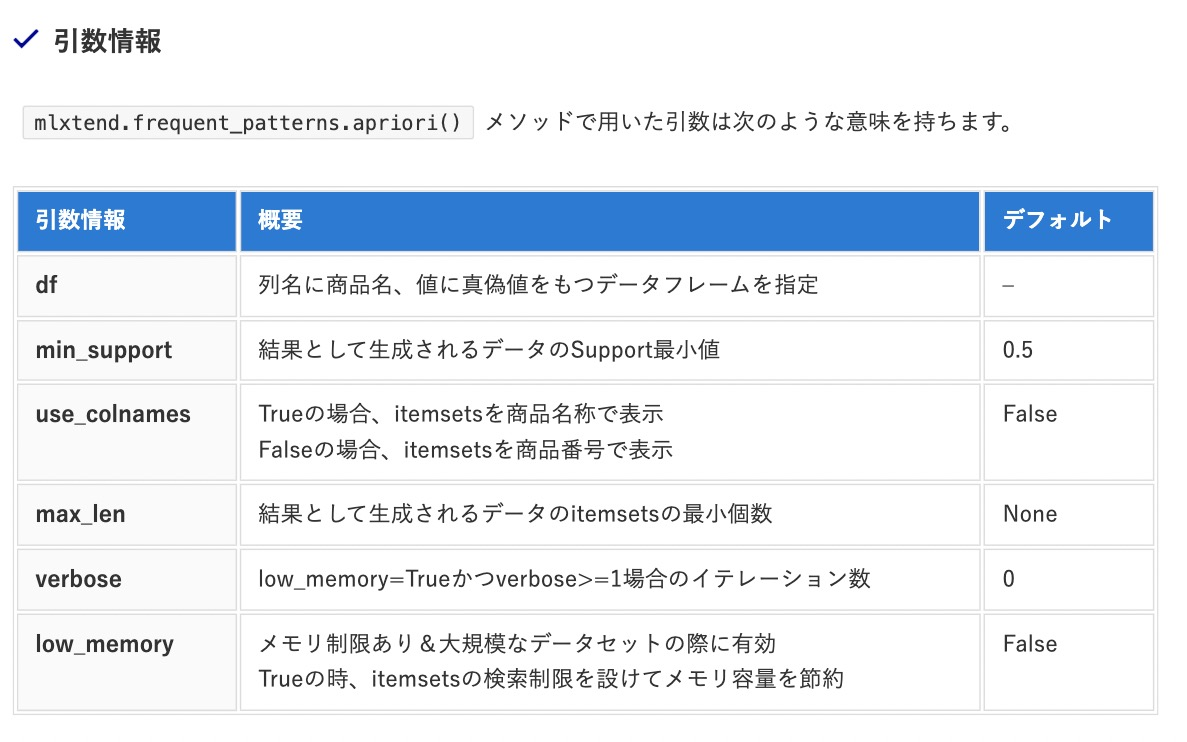

## モデル作成｜アソシエーション・ルール決定に用いる評価値算出

In [9]:
# 上記で得られた結果をもとに、アソシエーション・ルールを抽出するための評価値を取得します。
# 以下のコードを実行しましょう。

from mlxtend.frequent_patterns import association_rules

# アソシエーション・ルール抽出
df_rules = association_rules(freq_items,             # supportとitemsetsを持つデータフレーム
                             metric = "confidence",  # アソシエーション・ルールの評価指標
                             min_threshold = 0.1,    # metricsの閾値
                            )

display(df_rules)

# mlxtend.frequent_patterns.association_rules()メソッド用いることで、アソシエーション・ルールの決定するための評価指標が算出できます。

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
...,...,...,...,...,...,...,...,...,...,...
455,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078,0.745217
456,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,0.743056
457,(curd),(rolls/buns),0.053279,0.183935,0.010066,0.188931,1.027164,0.000266,1.006160,0.027934
458,(napkins),(tropical fruit),0.052364,0.104931,0.010066,0.192233,1.831988,0.004571,1.108078,0.479240


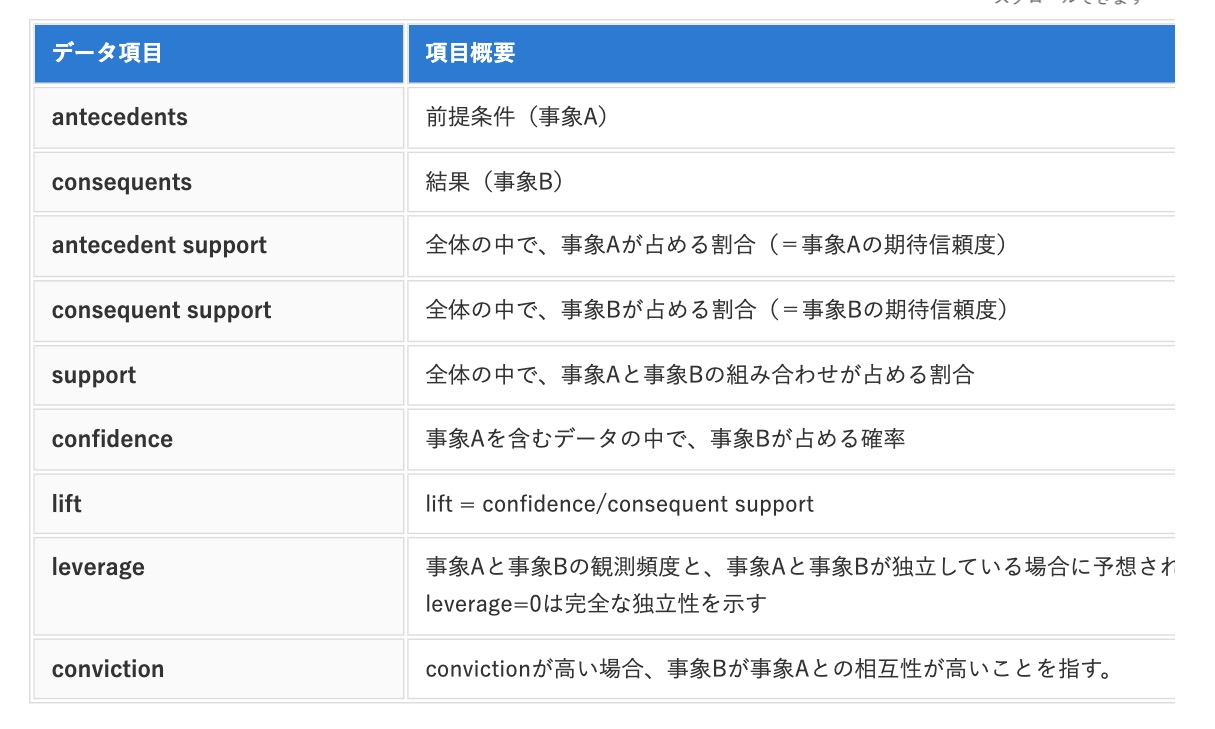

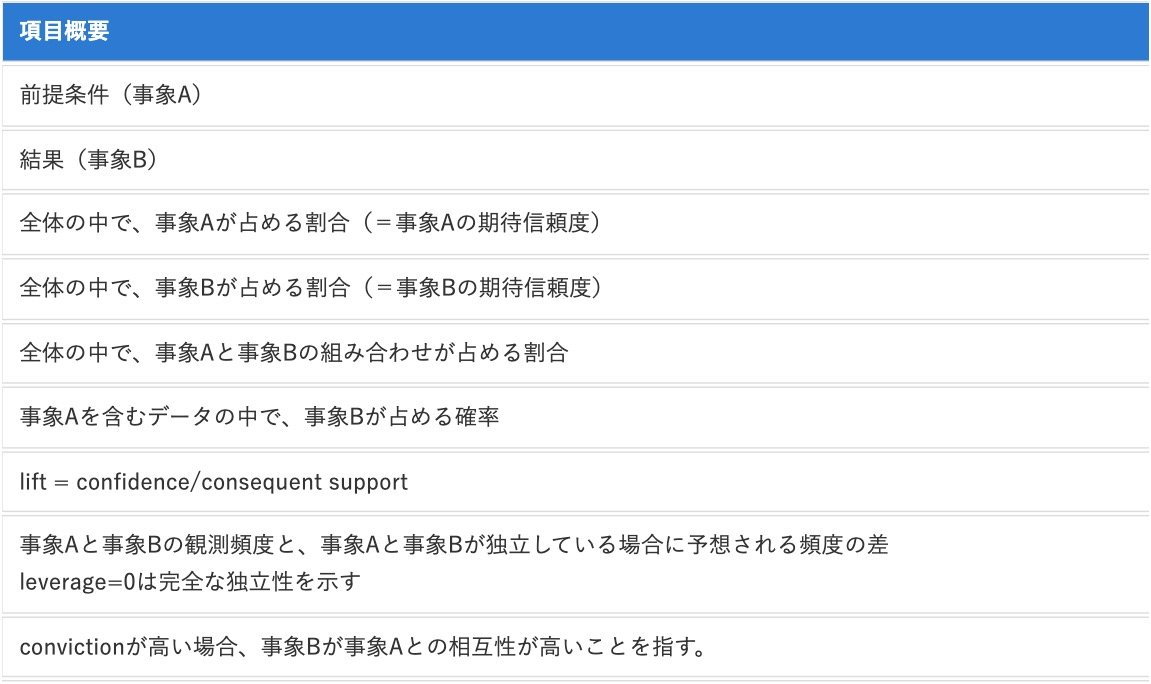

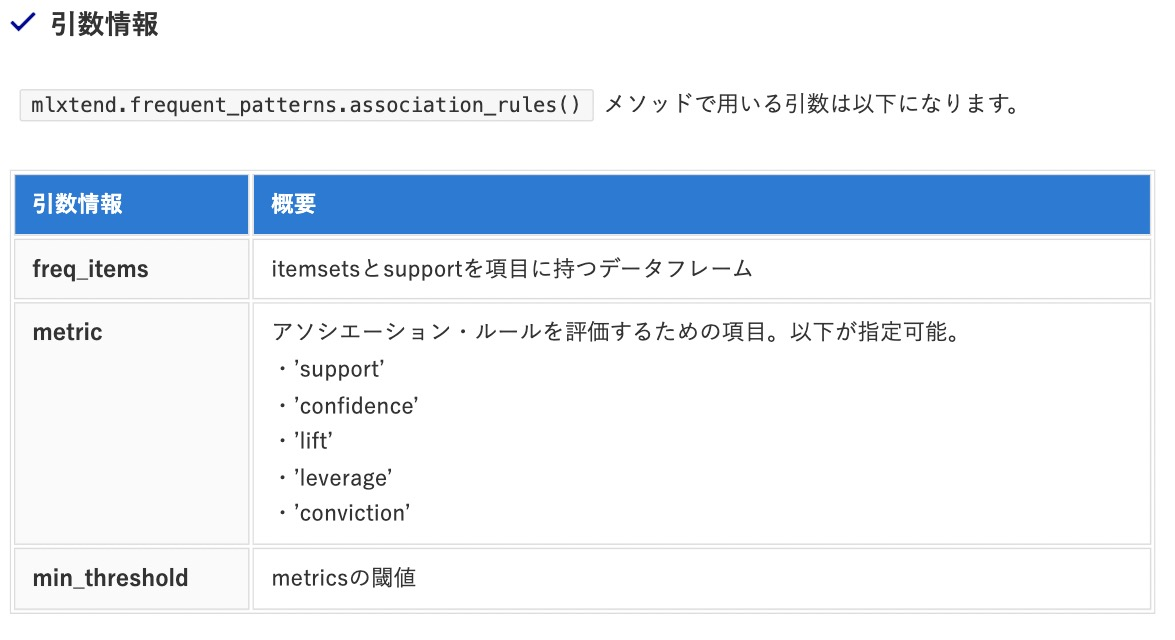

## アソシエーション・ルールの決定

In [10]:
# アソシエーション分析モデルより得られた結果をもとにデータを抽出し、最終的なアソシエーション・ルールを決定します。
# そのための抽出条件として今回は信頼度>0.2かつリフト値>3.0を設定することとします。

results = df_rules[(df_rules['confidence'] > 0.2) &  # 信頼度
          (df_rules['lift'] > 3.0)]                  # リフト値

display(results)

# confidence: P(consequents | antecedents) = P(antecedents ∪ consequents) / P(antecedents) is correct
# confidence(antecedents → consequents) = support(antecedents ∪ consequents) / support(antecedents)
# confidence(beef → root vegetables) = support(beef ∪ root vegetables) / support(beef)

# lift:　confidence / consequent support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
163,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
300,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
301,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705,0.707403
415,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
416,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,0.717225
445,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206,0.725409


In [11]:
display(results.loc[:,["antecedents","consequents","confidence","lift"]])

# 以下の結果において、例えば163行目を見ると、「beef」を購入する顧客は「root vegatables」を普通より3倍高い確率で購入していることが分かりました。
# レコメンド機能実装やクロスセルを促す際は「もし顧客がbeefを購入する場合、root vegetablesをいくつかレコメンドする」というアソシエーション・ルールが適用できそうですね。

# 実際のアソシエーション分析では、分析の目的や得られた結果に合わせてアソシエーション・ルールを設定するようにしましょう。

# ※ root vegetablesの出現によって(要素が追加されることで、)beefが購買される確率が普通より3倍高くなる。
# ※ root vegetableとbeefには強い関連性があることが示唆される

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,confidence,lift
163,(beef),(root vegetables),0.331395,3.040367
300,"(root vegetables, tropical fruit)",(other vegetables),0.584541,3.020999
301,"(tropical fruit, other vegetables)",(root vegetables),0.342776,3.144780
415,"(root vegetables, citrus fruit)",(other vegetables),0.586207,3.029608
416,"(other vegetables, citrus fruit)",(root vegetables),0.359155,3.295045
445,"(other vegetables, yogurt)",(whipped/sour cream),0.234192,3.267062


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
